<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/Supervised_Learning_Keras_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning
# Keras Dataset: Boston Housing

## Introduction

The Boston Housing database consists of 506 housing prices. Each house has 13 characteristics which is to be used to predict the house price.

## Dataset
+ The 13 characteristics have different ranges of values, the values are initially scaled to improve model fit.
+ Different combination of dense layers are attempted to identify a combination that does not underfit or overfit the data.

## Methodology
In this supervised learning project, Keras with Tensorflow backend was used.
+ To speed up learning, sklearn's standard scalar was used to normalize the input data
+ To eliminate possibility of underfit model, architectures with increasing number of layers were constructed.
+ To eliminate possibility of overfit model, accuracy on test cases was evaluated

### Architectures
| Model # | Optimizer | Loss | # hidden layers | Layer 1 | Layer 2 | Layer 3 | Layer 4 | Layer 5 | Layer 6 | Change | Error - Train | Error - Test | Time/step |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| 1 | RMSProp | MSE | 2 | 4 | 8 | - | - | - | - | Base | 3096.63 | 3748.06 | 83us | 
| 2 | RMSProp | MSE | 2 | 8 | 16 | - | - | - | - | Nodes | 2599.0 | 3566.8 | 117us |
| 3 | RMSProp | MSE | 3 | 8 | 8 | 16 | - | - | - | Layers | 2283.29 | 3317.05 | 61us |
| 4 | RMSProp | MSE | 5 | 8 | 8 | 8 | 16 | 16 | - | Layers, Nodes | 2198.99 | 2837.9 | 60us | 
| 5 | RMSProp | MSE | 5 | 32 | 32 | 32 | 64 | 64 | - | Nodes | 1483.91 | 2760.71 | 90us | 
| 6 | RMSProp | MAE | 3 | 8 | 8 | 16 | - | - | - | Loss | 2276.67 | 3020.35 | 94us | 
| 7 | Adam | MSE | 3 | 8 | 8 | 16 | - | - | - | Optimizer | 2389.77 | 3041.9 | 71us |
| 8 | Adam | MAE | 5 | 8 | 8 | 8 | 16 | 16 | - | Combined | 2193.58 | 2823.31 | 83us |

### Optimization
+ Increasing the number of layers from 2 to 3 to 5 decreased the test and training error. However, further increase in the number of nodes / layer dramatically decreased the training error but only marginally decreased the testing error. This indicates that the model has started to overfit the training data. 
+ Change of loss function from MSE to MAE decreased the error, so, the recommended loss function is MAE
+ Change of optimizer from RMSProp to Adam increased the time per step but increased the testing accuracy, so, it is the recommended optimizer.


## Conclusion
+ The optimal combination of dense layers consisted of 5 layers of 8, 8, 8, 8, 16, and 16 nodes each.
+ Adam optimizer and MAE loss function were found to be superior to RMSprop and MSE loss function.
+ Use of these parameters caused the training and testing error to drop from 22386.56 to 2193.58 dollars and 22975.36 to 2823.31 dollars respectively.

In [0]:
! pip install Keras
! pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /opt/anaconda3/lib/python3.7/site-packages (2.0.0)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

from keras.datasets import boston_housing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
(x_train, Y_train), (x_test, Y_test) =  boston_housing.load_data()
print(x_train.shape, Y_train.shape)
print(x_test.shape, Y_test.shape)

Using TensorFlow backend.


(404, 13) (404,)
(102, 13) (102,)


### Scaling the input data
Only Training data is scaled, not Test data

In [0]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# then we call the transform method to scale both the training and testing data
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

# a sample output
print(X_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


### Model # 1

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100) 
print(history.history.keys())

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


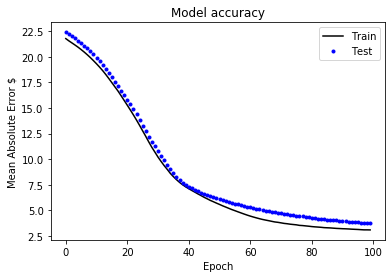

Train - Error in predicting housing prices went down from $21782.55 to $3096.63
Test  - Error in predicting housing prices went down from $22403.72 to $3748.06 



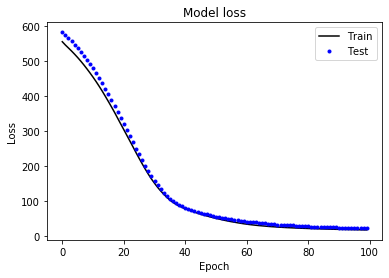

102/102 [==============================] - 0s 83us/step


[23.548821093989353, 3.7480573654174805]

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error $')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

**Observation**

As the error is still decreasing for both train and test cases, the model is underfitting the data. As more data can not be added, adding more layer could help.

### Model # 2

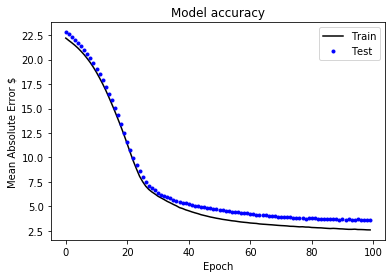

Train - Error in predicting housing prices went down from $22195.87 to $2599.0
Test  - Error in predicting housing prices went down from $22793.91 to $3566.8 



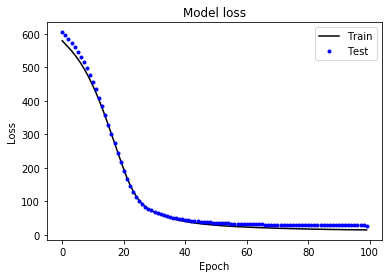

102/102 [==============================] - 0s 117us/step


[27.43830093682981, 3.5668017864227295]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100) 

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error $')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

### Model # 3

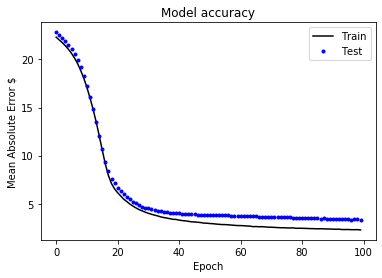

Train - Error in predicting housing prices went down from $22309.18 to $2283.29
Test  - Error in predicting housing prices went down from $22824.17 to $3317.05 



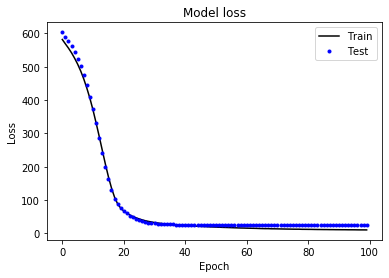

102/102 [==============================] - 0s 61us/step


[24.374973371917125, 3.317047119140625]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100) 

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error $')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

### Model # 4

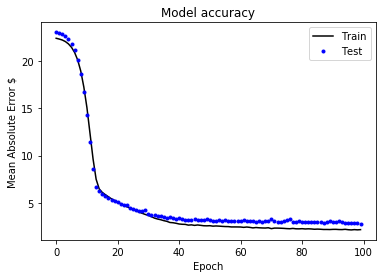

Train - Error in predicting housing prices went down from $22365.2 to $2198.99
Test  - Error in predicting housing prices went down from $22999.96 to $2837.9 



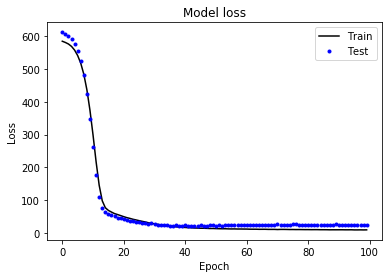

102/102 [==============================] - 0s 60us/step


[22.253300386316635, 2.8378984928131104]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100) 

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error $')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

### Model # 5

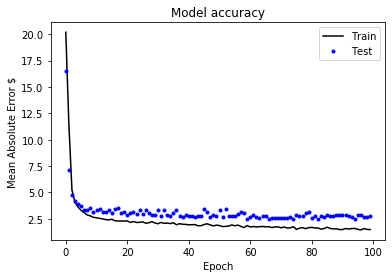

Train - Error in predicting housing prices went down from $20184.31 to $1483.91
Test  - Error in predicting housing prices went down from $16545.86 to $2760.71 



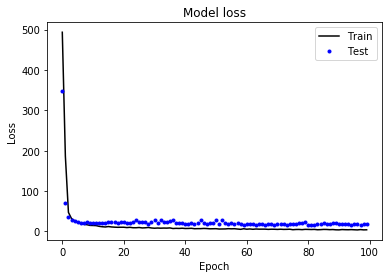

102/102 [==============================] - 0s 90us/step


[17.80040845683977, 2.760707139968872]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100) 

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error $')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

### Model # 6: Evaluating change in loss metric

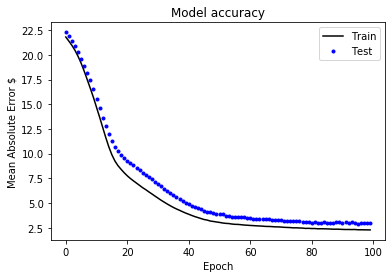

Train - Error in predicting housing prices went down from $21810.36 to $2276.67
Test  - Error in predicting housing prices went down from $22293.13 to $3020.35 



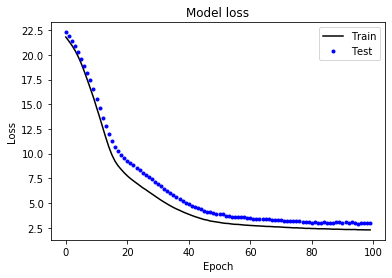

102/102 [==============================] - 0s 94us/step


[3.020352316837685, 3.0203521251678467]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100) 

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error $')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

### Model # 7:  Evaluating change in optimizer

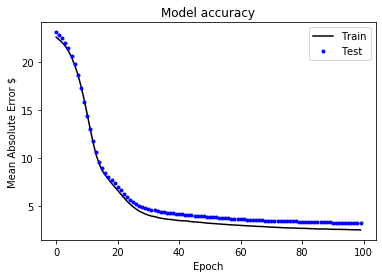

Train - Error in predicting housing prices went down from $22616.84 to $2536.53
Test  - Error in predicting housing prices went down from $23130.0 to $3246.48 



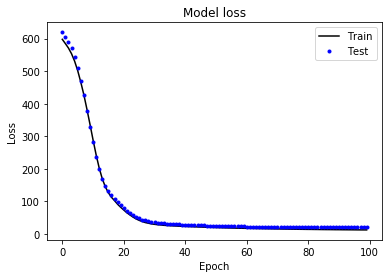

102/102 [==============================] - 0s 60us/step


[20.06973431157131, 3.2464797496795654]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100) 

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error $')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test) 

### Model # 8:  Optimal configuration

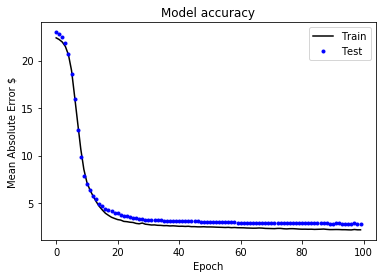

Train - Error in predicting housing prices went down from $22386.56 to $2193.58
Test  - Error in predicting housing prices went down from $22975.36 to $2823.31 



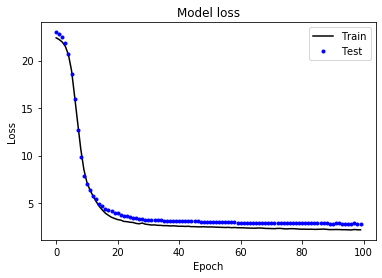

102/102 [==============================] - 0s 83us/step


[2.823308187372544, 2.823308229446411]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 0, 
                    validation_data = (X_test, Y_test),
                    epochs=100) 

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Mean Absolute Error $')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)